In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv("../data/df_selection1.csv", index_col=0)

In [3]:
data.head()

,UNIQUE_ID,DATE,TIME
0,114750597,02/16/2016,3:00:02 PM
1,114750598,02/16/2016,10:14:24 AM
2,114750599,02/16/2016,4:51:03 PM
3,114750600,02/16/2016,9:46:39 PM
4,114750601,02/16/2016,1:13:21 PM


In [4]:
data.dtypes

UNIQUE_ID     int64
DATE         object
TIME         object
dtype: object

In [75]:
data.shape

(48302966, 3)

In [65]:
#data.sort_values(by='DATE')

,UNIQUE_ID,DATE,TIME
15803806,70781459,01/01/2011,4:57:06 AM
15909291,70788912,01/01/2011,5:54:30 PM
15909292,70788913,01/01/2011,5:14:43 PM
15909293,70788914,01/01/2011,5:19:44 PM
15909294,70788915,01/01/2011,5:22:55 PM
...,...,...,...
34396901,89919951,12/31/2012,12:50:58 PM
34396900,89919950,12/31/2012,12:48:41 PM
34396899,89919949,12/31/2012,12:47:22 PM
34396897,89919946,12/31/2012,12:45:57 PM


In [76]:
# First, convert the DATE and TIME columns to datetime format
data['DATE_TIME'] = pd.to_datetime(data['DATE'] + ' ' + data['TIME'])

# Group by hour
calls_per_hour = data.groupby(pd.Grouper(key='DATE_TIME', freq='H'))['UNIQUE_ID'].count()


In [78]:
#calls_per_hour.to_csv('calls_per_hour.csv')

In [77]:
# Group by day
calls_per_day = data.groupby(pd.Grouper(key='DATE_TIME', freq='D'))['UNIQUE_ID'].count()

In [79]:
#calls_per_day.to_csv('calls_per_day.csv')

In [80]:
# Group by month
calls_per_month = data.groupby(pd.Grouper(key='DATE_TIME', freq='M'))['UNIQUE_ID'].count()

In [81]:
#calls_per_month.to_csv('calls_per_month.csv')

In [82]:
# Group by year
calls_per_year = data.groupby(pd.Grouper(key='DATE_TIME', freq='Y'))['UNIQUE_ID'].count()

In [83]:
calls_per_year.to_csv('calls_per_year.csv')

In [84]:
# group the data by year and count the number of calls per year
calls_per_year = data.groupby(data['DATE_TIME'].dt.year)['UNIQUE_ID'].count()

In [85]:
calls_per_year

DATE_TIME
2011    9573571
2012    8937107
2013    7779081
2014    7329210
2015    7718651
2016    6965346
Name: UNIQUE_ID, dtype: int64

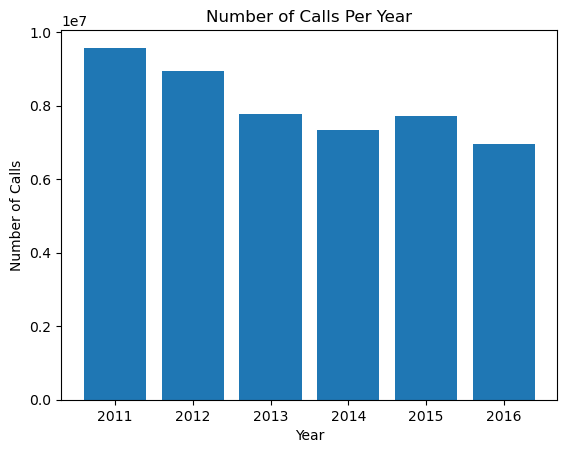

In [86]:
# create a bar plot of the data
plt.bar(calls_per_year.index, calls_per_year.values)

# set the x-axis label
plt.xlabel('Year')

# set the y-axis label
plt.ylabel('Number of Calls')

# set the title of the plot
plt.title('Number of Calls Per Year')

# show the plot
plt.show()

In [87]:
data['DATE'] = pd.to_datetime(data['DATE'])

# filter data for a specific year (e.g. 2010)
year = 2014
month = 12
data_filtered = data[(data['DATE'].dt.year == year) & (data['DATE'].dt.month == month)]
data_filtered

,UNIQUE_ID,DATE,TIME,DATE_TIME
76543497,105393410,2014-12-12,11:20:09 PM,2014-12-12 23:20:09
81424299,105175517,2014-12-02,5:07:37 PM,2014-12-02 17:07:37
81424481,105176655,2014-12-02,1:40:11 PM,2014-12-02 13:40:11
81425280,105177240,2014-12-02,10:30:16 AM,2014-12-02 10:30:16
81425401,105183805,2014-12-03,2:03:32 AM,2014-12-03 02:03:32
...,...,...,...,...
81996140,105706565,2014-12-31,11:42:46 AM,2014-12-31 11:42:46
81996141,105706566,2014-12-31,5:55:29 PM,2014-12-31 17:55:29
81996142,105706567,2014-12-31,10:31:28 AM,2014-12-31 10:31:28
81996143,105706568,2014-12-31,5:34:59 PM,2014-12-31 17:34:59


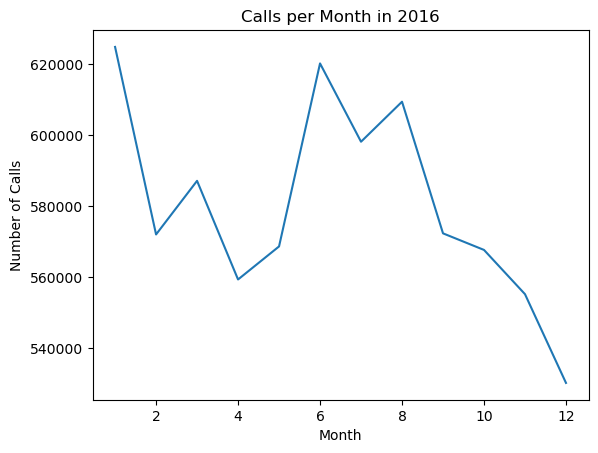

In [90]:
data['DATE'] = pd.to_datetime(data['DATE'])

# Filter data for a specific year (e.g. 2019)
year = 2016
data_filtered = data[data['DATE'].dt.year == year]

# Group the filtered data by month and get the count of calls
calls_per_month = data_filtered.groupby(data_filtered['DATE'].dt.month)['UNIQUE_ID'].count()

# Plot the chart
plt.plot(calls_per_month.index, calls_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Calls per Month in {}'.format(year))
plt.show()

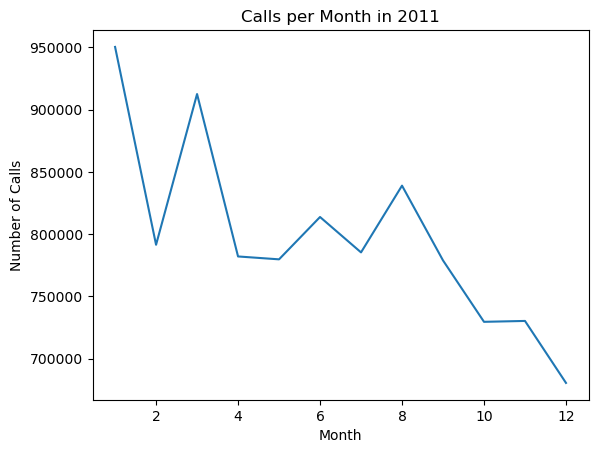

In [91]:
# Filter data for a specific year (e.g. 2019)
year = 2011
data_filtered = data[data['DATE'].dt.year == year]

# Group the filtered data by month and get the count of calls
calls_per_month = data_filtered.groupby(data_filtered['DATE'].dt.month)['UNIQUE_ID'].count()

# Plot the chart
plt.plot(calls_per_month.index, calls_per_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.title('Calls per Month in {}'.format(year))
plt.show()

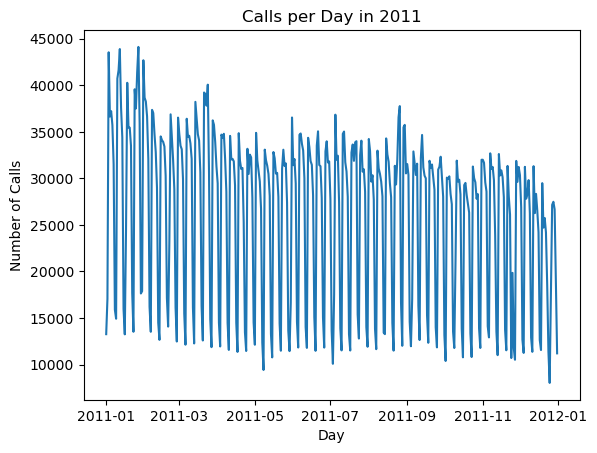

In [92]:
year = 2011
data_filtered = data[data['DATE'].dt.year == year]

# Group the filtered data by day and get the count of calls
calls_per_day = data_filtered.groupby(data_filtered['DATE'].dt.date)['UNIQUE_ID'].count()

# Create a sequence of 365 days starting from January 1st of the year
idx = pd.date_range(start='{}-01-01'.format(year), periods=365)

# Reindex the calls_per_day series with the new index
calls_per_day = calls_per_day.reindex(idx, fill_value=0)

# Plot the chart
plt.plot(calls_per_day.index, calls_per_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Day in {}'.format(year))
plt.show()


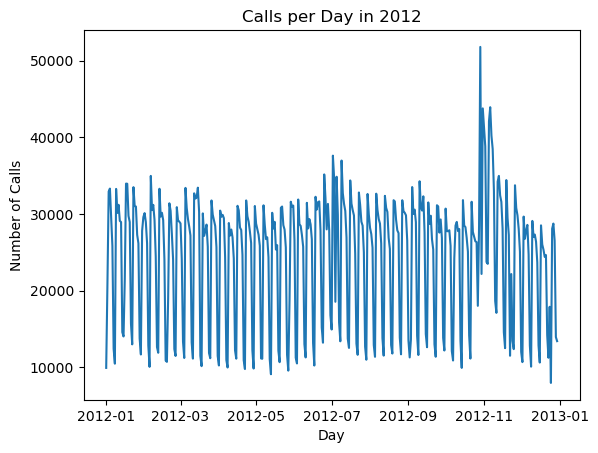

In [93]:
year = 2012
data_filtered = data[data['DATE'].dt.year == year]

# Group the filtered data by day and get the count of calls
calls_per_day = data_filtered.groupby(data_filtered['DATE'].dt.date)['UNIQUE_ID'].count()

# Create a sequence of 365 days starting from January 1st of the year
idx = pd.date_range(start='{}-01-01'.format(year), periods=365)

# Reindex the calls_per_day series with the new index
calls_per_day = calls_per_day.reindex(idx, fill_value=0)

# Plot the chart
plt.plot(calls_per_day.index, calls_per_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Day in {}'.format(year))
plt.show()

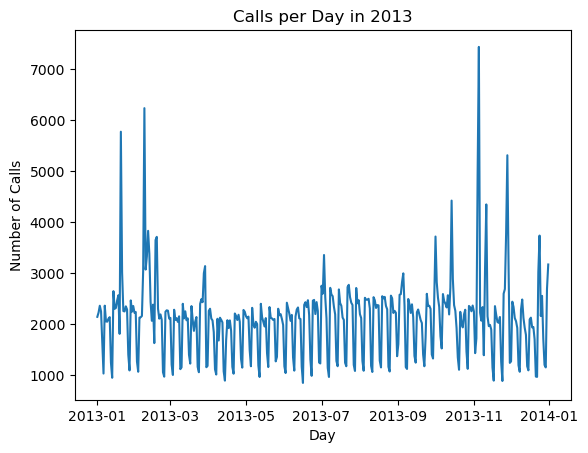

In [56]:
year = 2013
data_filtered = data[data['DATE'].dt.year == year]

# Group the filtered data by day and get the count of calls
calls_per_day = data_filtered.groupby(data_filtered['DATE'].dt.date)['UNIQUE_ID'].count()

# Create a sequence of 365 days starting from January 1st of the year
idx = pd.date_range(start='{}-01-01'.format(year), periods=365)

# Reindex the calls_per_day series with the new index
calls_per_day = calls_per_day.reindex(idx, fill_value=0)

# Plot the chart
plt.plot(calls_per_day.index, calls_per_day.values)
plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Day in {}'.format(year))
plt.show()

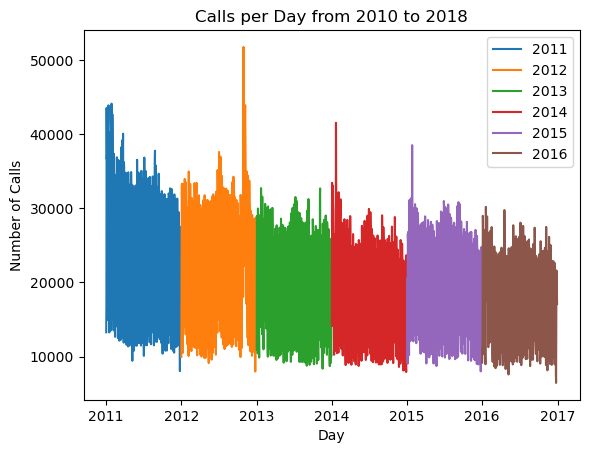

In [95]:
data['DATE'] = pd.to_datetime(data['DATE'])

# Loop through the years from 2010 to 2018
for year in range(2011, 2017):
    # Filter the data for the current year
    data_filtered = data[data['DATE'].dt.year == year]
    
    # Group the filtered data by day and get the count of calls
    calls_per_day = data_filtered.groupby(data_filtered['DATE'].dt.date)['UNIQUE_ID'].count()
    
    # Create a sequence of 365 days starting from January 1st of the year
    idx = pd.date_range(start='{}-01-01'.format(year), periods=365)
    
    # Reindex the calls_per_day series with the new index
    calls_per_day = calls_per_day.reindex(idx, fill_value=0)
    
    # Plot the chart for the current year
    plt.plot(calls_per_day.index, calls_per_day.values, label=year)

plt.xlabel('Day')
plt.ylabel('Number of Calls')
plt.title('Calls per Day from 2010 to 2018')
plt.legend()
plt.show()